In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy as sp
import pandas as pd
import datetime

%matplotlib inline
plt.rcParams['font.family'] = 'IPAPGothic'

train_A = pd.read_table('../train/train_A.tsv')

In [2]:
len(train_A['product_id'].unique())

13866

In [6]:
len(train_A['user_id'].unique())

58658

In [42]:
len(train_A.index)

3376493

## 事前調査

- 「人材」セクションの特徴をつかむ

In [2]:
train_A['event_type_0'] = train_A['event_type'] == 0
train_A['event_type_1'] = train_A['event_type'] == 1
train_A['event_type_2'] = train_A['event_type'] == 2
train_A['event_type_3'] = train_A['event_type'] == 3

- まずユーザーの行動をイメージするために個人のデータを見る。

In [8]:
train_A[train_A['user_id'] == '0000000_A'].sort_values(by = 'time_stamp')

,user_id,product_id,event_type,ad,time_stamp,event_type_0,event_type_1,event_type_2,event_type_3
2,0000000_A,00014068_a,1,-1,2017-04-08 11:57:53.746,False,True,False,False
3,0000000_A,00001254_a,1,-1,2017-04-08 12:04:26.008,False,True,False,False
4,0000000_A,00003316_a,1,-1,2017-04-08 12:05:31.326,False,True,False,False
0,0000000_A,00009250_a,1,-1,2017-04-08 12:09:04.629,False,True,False,False
5,0000000_A,00003009_a,1,-1,2017-04-14 13:55:07.446,False,True,False,False
1,0000000_A,00009250_a,1,-1,2017-04-27 12:55:57.783,False,True,False,False
14,0000000_A,00008263_a,1,-1,2017-04-27 12:56:42.873,False,True,False,False
8,0000000_A,00008525_a,1,-1,2017-04-27 12:59:09.600,False,True,False,False
9,0000000_A,00009753_a,1,-1,2017-04-27 13:01:27.924,False,True,False,False
7,0000000_A,00004433_a,1,-1,2017-04-27 13:03:18.492,False,True,False,False


In [47]:
# 購入行動のうち、アド経由の購入は何割か？
train_A[train_A['event_type_3'] == True]['ad'].value_counts()

1    57398
0    17163
Name: ad, dtype: int64

- アド経由の行動は割と多い。

## 人材について分かっていること
- カート、 閲覧、クリック、購入の4つ
- 購入行動は、アド経由が7割、そうでない場合が3割くらい　→　アドが比較的重要
- 閲覧のみのユーザーが多い

## 調べたいこと、仮説
##### ユーザーの分類
- 閲覧ばかりの人、クリックや購入をする人で分類できるか？

##### 商品の分類
- よく閲覧や購入されている商品はないか？

##### ユーザーと商品を合わせた分類
- 対応するユーザーグループと商品グループの組み合わせは無いか？

##### 時間に関連した分析
- 購入した商品は事前に閲覧されているか？(アド経由購入/アド経由でない購入 について)
- 2

## ユーザーの分類

In [6]:
users = train_A['user_id'].unique()
print('ユーザー数：'+str(len(users)))

ユーザー数：58658


In [48]:
print('カートを使用したユーザー数：'+str(len(train_A[train_A['event_type'] == 0]['user_id'].unique())))
print('閲覧したユーザー数：'+str(len(train_A[train_A['event_type'] == 1]['user_id'].unique())))
print('クリックしたユーザー数：'+str(len(train_A[train_A['event_type_2']]['user_id'].unique())))
print('購入したユーザー数：'+str(len(train_A[train_A['event_type_3']]['user_id'].unique())))

カートを使用したユーザー数：36619
閲覧したユーザー数：50829
クリックしたユーザー数：8667
購入したユーザー数：17865


In [12]:
print('ユーザーごとの購入回数の分布')
print(train_A.groupby('user_id')['event_type_0'].sum().value_counts().sort_index())

ユーザーごとの購入回数の分布
0.0       22039
1.0        1821
2.0        1560
3.0        1354
4.0        1210
5.0        1069
6.0         996
7.0         920
8.0         847
9.0         769
10.0       9225
11.0        770
12.0        644
13.0        568
14.0        471
15.0        462
16.0        433
17.0        402
18.0        366
19.0        300
20.0        695
21.0        414
22.0        365
23.0        305
24.0        280
25.0        253
26.0        257
27.0        210
28.0        217
29.0        212
          ...  
1077.0        1
1081.0        1
1087.0        1
1127.0        1
1137.0        1
1151.0        1
1225.0        1
1284.0        1
1290.0        1
1296.0        1
1303.0        1
1311.0        1
1329.0        1
1363.0        1
1378.0        1
1403.0        1
1413.0        1
1469.0        1
1495.0        1
1648.0        1
1650.0        1
1789.0        1
1866.0        1
1870.0        1
1910.0        1
1921.0        1
2021.0        1
3799.0        1
5601.0        1
8168.0        1
Name: eve

- カート回数8168回とは･･･？ユーザーを特定して、行動に注目

In [22]:
train_A.groupby('user_id')['event_type_0'].sum()[train_A.groupby('user_id')['event_type_0'].sum() > 8000]

user_id
0012215_A    8168.0
Name: event_type_0, dtype: float64

In [36]:
len(train_A[train_A['user_id'] == '0012215_A'].sort_values(by = 'time_stamp')[train_A['event_type_0'] == True]['time_stamp'].unique())

c:\python34\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


842

- 購入数は22と割と普通。8168回カートに入れているが、カートに入れる行動をしたのは842回
- →ほぼ10人単位で入れている
- →たぶん複数選択の機能があり、10人が上限なのだろう

In [10]:
print('ユーザーごとの購入回数の分布')
print(train_A.groupby('user_id')['event_type_3'].sum().value_counts().sort_index())

ユーザーごとの購入回数の分布
0.0      40793
1.0       6259
2.0       3602
3.0       2234
4.0       1470
5.0        966
6.0        673
7.0        499
8.0        385
9.0        268
10.0       224
11.0       177
12.0       136
13.0       117
14.0       102
15.0        67
16.0        68
17.0        71
18.0        61
19.0        46
20.0        37
21.0        33
22.0        38
23.0        34
24.0        24
25.0        16
26.0        12
27.0        21
28.0        16
29.0        16
         ...  
76.0         1
77.0         1
80.0         1
83.0         1
84.0         1
85.0         2
88.0         1
89.0         1
96.0         2
99.0         1
101.0        1
102.0        1
103.0        1
106.0        1
111.0        1
116.0        1
120.0        1
123.0        1
124.0        1
125.0        1
136.0        2
138.0        1
142.0        1
147.0        1
151.0        1
152.0        1
166.0        1
191.0        1
209.0        1
213.0        1
Name: event_type_3, Length: 100, dtype: int64


- 購入している人は全体の30%くらい。

In [28]:
print('ユーザーごとのクリック回数の分布')
print(train_A.groupby('user_id')['event_type_2'].sum().value_counts().sort_index())

ユーザーごとのクリック回数の分布
0.0      49991
1.0       3135
2.0       1544
3.0       1083
4.0        754
5.0        537
6.0        343
7.0        252
8.0        169
9.0        165
10.0       100
11.0        95
12.0        87
13.0        61
14.0        52
15.0        33
16.0        31
17.0        20
18.0        23
19.0        24
20.0        11
21.0        20
22.0        18
23.0        11
24.0        10
25.0         7
26.0         7
27.0         6
28.0         7
29.0         4
30.0         6
31.0         3
32.0         4
33.0         3
34.0         4
35.0         7
36.0         3
38.0         3
39.0         2
40.0         3
41.0         3
42.0         1
43.0         1
44.0         1
45.0         2
49.0         1
51.0         1
54.0         1
55.0         1
57.0         2
61.0         2
62.0         1
69.0         1
89.0         1
103.0        1
Name: event_type_2, dtype: int64


#### (閲覧してない1人は何をしたのか？)

In [9]:
set(users) - set(train_C[train_C['event_type'] == 1]['user_id'].unique())

{'0014945_C'}

In [10]:
train_C[train_C['user_id'] == '0014945_C'].sort_values(by = 'time_stamp')

,user_id,product_id,event_type,ad,time_stamp,event_type_1,event_type_2,event_type_3
1044795,0014945_C,00258288_c,3,0,2017-04-15 05:15:05.581,False,False,True
1044798,0014945_C,00275212_c,3,0,2017-04-15 05:31:06.514,False,False,True
1044797,0014945_C,00035121_c,3,0,2017-04-15 05:34:07.420,False,False,True
1044790,0014945_C,00010767_c,3,0,2017-04-15 05:38:13.907,False,False,True
1044796,0014945_C,00218936_c,3,0,2017-04-15 05:41:18.775,False,False,True
1044791,0014945_C,00045567_c,3,0,2017-04-15 05:57:42.433,False,False,True
1044789,0014945_C,00129143_c,3,0,2017-04-15 06:00:13.124,False,False,True
1044799,0014945_C,00060189_c,3,0,2017-04-15 06:01:56.894,False,False,True
1044792,0014945_C,00050206_c,3,0,2017-04-15 06:10:46.641,False,False,True
1044794,0014945_C,00297716_c,3,0,2017-04-15 06:14:01.259,False,False,True


- 購入だけしている

##### クリックと購入の関係

In [3]:
user_e2 = train_A.groupby('user_id')['event_type_2'].sum().sort_index()
user_e3 = train_A.groupby('user_id')['event_type_3'].sum().sort_index()
merged_count_df = pd.concat([user_e2, user_e3], axis=1)
merged_count_df.columns = ['クリック','購入']
pd.pivot_table(merged_count_df, index=['クリック'], columns=['購入'], aggfunc=lambda x: len(x), fill_value=0)

購入,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,136.0,138.0,142.0,147.0,151.0,152.0,166.0,191.0,209.0,213.0
クリック,,,,,,,,,,,,,,,,,,,,,
0.0,35502,5091,2986,1812,1163,781,529,403,312,217,...,2,1,1,1,0,1,1,1,1,1
1.0,1923,432,217,159,107,73,46,40,23,19,...,0,0,0,0,0,0,0,0,0,0
2.0,915,229,109,76,64,28,31,12,6,10,...,0,0,0,0,1,0,0,0,0,0
3.0,641,145,90,59,44,27,16,12,10,6,...,0,0,0,0,0,0,0,0,0,0
4.0,487,91,63,29,13,18,14,5,5,3,...,0,0,0,0,0,0,0,0,0,0
5.0,330,67,38,25,20,8,13,9,3,3,...,0,0,0,0,0,0,0,0,0,0
6.0,226,53,16,15,16,2,3,3,3,0,...,0,0,0,0,0,0,0,0,0,0
7.0,162,24,22,10,8,5,7,3,1,2,...,0,0,0,0,0,0,0,0,0,0
8.0,103,32,11,8,3,3,0,0,2,1,...,0,0,0,0,0,0,0,0,0,0


In [10]:
merged_count_df.corr()

,クリック,購入
クリック,1.000000,0.042118
購入,0.042118,1.000000


- クリック数と購入数に相関は無い(クリックするからといって購入する訳では無い)

In [4]:
user_e1 = train_A.groupby('user_id')['event_type_1'].sum().sort_index()
merged3_count_df = pd.concat([merged_count_df, user_e1], axis=1)
merged3_count_df.columns = ['クリック', '購入', '閲覧']
merged3_count_df.corr()

,クリック,購入,閲覧
クリック,1.000000,0.042118,0.101818
購入,0.042118,1.000000,0.195434
閲覧,0.101818,0.195434,1.000000


In [5]:
user_e0 = train_A.groupby('user_id')['event_type_0'].sum().sort_index()
merged0_count_df = pd.concat([merged3_count_df, user_e0], axis=1)
merged0_count_df.columns = ['クリック', '購入', '閲覧','カート']
merged0_count_df.corr()

,クリック,購入,閲覧,カート
クリック,1.000000,0.042118,0.101818,0.050812
購入,0.042118,1.000000,0.195434,0.305537
閲覧,0.101818,0.195434,1.000000,0.234322
カート,0.050812,0.305537,0.234322,1.000000


- 閲覧と購入は少し関係あり。
- クリックと
閲覧の相関は低いので、クリック→閲覧→購入の流れはあまり期待できず、**クリックは重要視されない**
- カートと購入は相関がある

##### k-Means、エルボー法で分類

In [8]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(merged0_count_df)
merged0_count_df_std = sc.transform(merged0_count_df)
from sklearn.cluster import KMeans
X = merged0_count_df_std
dist_list =[]
for i in range(1,20):
    kmpp = KMeans(n_clusters=i,init="random",n_init=5,max_iter=100,random_state=0) 
    kmpp.fit(X)
    dist_list.append(kmpp.inertia_)

c:\python34\lib\site-packages\matplotlib\font_manager.py:1297: UserWarning: findfont: Font family ['IPAPGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


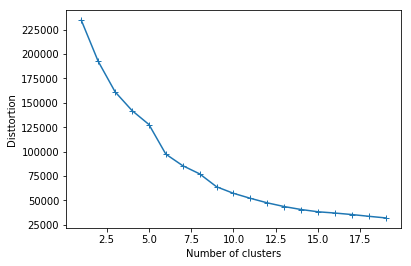

In [9]:
plt.plot(range(1,20),dist_list,marker='+');
plt.xlabel("Number of clusters");
plt.ylabel("Disttortion");

- とりあえずk=9にする

In [10]:
X = merged0_count_df_std
kmpp = KMeans(n_clusters=9,init="random",random_state=0)
kmpp.fit(X)
label_df = pd.DataFrame(kmpp.labels_, columns=["cluster"])

In [11]:
label_df.groupby("cluster").size()

cluster
0        3
1      418
2     5766
3      223
4    49085
5       39
6        2
7     2543
8      579
dtype: int64

##### クリック数と購入数

In [12]:
target_df = merged0_count_df.reset_index().rename(columns={"index":"user_id"})["user_id"]
clustered_df = pd.concat([target_df, label_df], axis=1)
clustered_df.head()
clustered_df.to_csv("user_cluster_A.csv", sep=",", index=False)

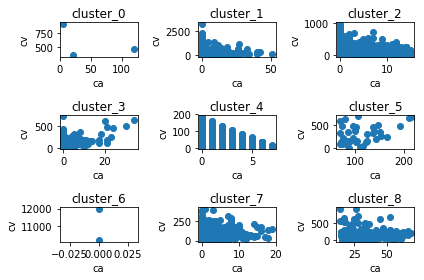

In [34]:
target_df = merged0_count_df.reset_index().rename(columns={"index":"user_id"})[['カート','閲覧','クリック', '購入']]
clustered_df = pd.concat([target_df, label_df], axis=1)
for i in range(0,9):
    df_sampled = clustered_df[clustered_df["cluster"] == i]
    plt.subplot(3, 3, i+1)
    plt.scatter(df_sampled.as_matrix()[:,3],df_sampled.as_matrix()[:,1])
    plt.xlabel('ca')
    plt.ylabel('cv')
    plt.title("cluster_" + str(i))
plt.tight_layout()

In [67]:
for i in range(9):
    corr_i = clustered_df[clustered_df["cluster"]==i].corr()/clustered_df[clustered_df["cluster"]==i].mean()
    print(str(i) +":\n"+ str(corr_i['購入']) + "\n")

0:
カート       -0.014772
閲覧        -0.009036
クリック       0.002627
購入         0.020270
cluster         NaN
Name: 購入, dtype: float64

1:
カート        0.034230
閲覧        -0.014850
クリック       0.015266
購入         0.129452
cluster         NaN
Name: 購入, dtype: float64

2:
カート       -0.043146
閲覧        -0.046176
クリック      -0.002280
購入         0.207530
cluster         NaN
Name: 購入, dtype: float64

3:
カート        0.076776
閲覧         0.176961
クリック       0.087918
購入         0.348438
cluster         NaN
Name: 購入, dtype: float64

4:
カート        0.559222
閲覧         0.309562
クリック       0.083166
購入         2.339721
cluster         NaN
Name: 購入, dtype: float64

5:
カート        0.002015
閲覧         0.003646
クリック      -0.001464
購入         0.009001
cluster         NaN
Name: 購入, dtype: float64

6:
カート       NaN
閲覧        NaN
クリック      NaN
購入        NaN
cluster   NaN
Name: 購入, dtype: float64

7:
カート        0.347233
閲覧         0.306833
クリック       0.112234
購入         0.994136
cluster         NaN
Name: 購入, dtype: float64

In [54]:
clustered_df[clustered_df["cluster"]==0].mean()

カート        5856.000000
閲覧          572.666667
クリック          1.000000
購入           49.333333
cluster       0.000000
dtype: float64

In [36]:
cluster_count = clustered_df.groupby('cluster').size()

In [37]:
cluster_feature = clustered_df.groupby('cluster').mean()

In [38]:
pd.concat([cluster_count,cluster_feature],axis=1).rename(columns={0: '人数'})

,人数,カート,閲覧,クリック,購入
cluster,,,,,
0,3,5856.000000,572.666667,1.000000,49.333333
1,418,543.488038,306.959330,0.803828,7.724880
2,5766,87.258065,89.016476,0.311828,4.818592
3,223,59.291480,128.529148,26.533632,2.869955
4,49085,8.555037,21.990486,0.157706,0.427401
5,39,340.692308,288.538462,0.743590,111.102564
6,2,0.000000,11078.000000,0.000000,0.000000
7,2543,18.910342,50.627212,6.761306,1.005899
8,579,76.580311,117.901554,0.683938,25.716753


0: 人数極小 cl極小　pdバラ　ca極大　cv大  
1: 人数小 　cl大　　pd極大　ca大　　cv大  
2: 人数普通 cl小　　pd大　　ca小　　cv普通  
3: 人数小 　cl極大　pd普通　ca普通　cv大  
4: 人数極大 cl極小　pd小　　ca小　　cv小  
5: 人数極小 cl小　　pd大　　ca小　　cv極大  
6: 人数極小 clゼロ　pd極大　caゼロ　cvゼロ  
7: 人数普通 cl大　　pd小　　ca小　　cv普通  
8: 人数小 　cl大　　pd普通　ca小　　cv大  



In [24]:
target_df = merged0_count_df.reset_index().rename(columns={"index":"user_id"})
clustered_df = pd.concat([target_df, label_df], axis=1)
clustered_df.groupby('cluster')['購入'].sum()

cluster
0      148.0
1     3229.0
2    27784.0
3      640.0
4    20979.0
5     4333.0
6        0.0
7     2558.0
8    14890.0
Name: 購入, dtype: float64

# ユーザーに関して：クリックと購入の

In [80]:
clustered_df[clustered_df['cluster']==3]

,クリック,購入,閲覧,cluster
1531,0.0,66.0,151.0,3
2341,0.0,136.0,334.0,3
2724,0.0,53.0,226.0,3
2907,0.0,49.0,84.0,3
3615,0.0,54.0,145.0,3
3909,0.0,152.0,251.0,3
4042,11.0,50.0,64.0,3
4055,0.0,54.0,227.0,3
4590,0.0,58.0,59.0,3
5027,0.0,106.0,687.0,3


##### 閲覧数の分布

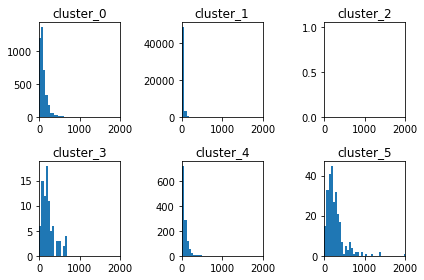

In [83]:
for i in range(0,6):
    df_sampled = clustered_df[clustered_df["cluster"] == i]
    plt.subplot(2, 3, i+1)
    p = df_sampled.as_matrix()[:,2]
    plt.hist(p,bins=int((p.max()-p.min())/50))
    plt.xlim(0,2000)
    plt.title("cluster_" + str(i))
plt.tight_layout()

- 閲覧が多いユーザー、購入が多いユーザー、クリックが多いユーザー、どれも多くないユーザーに分かれた

## 商品の分類

In [58]:
products = train_A['product_id'].unique()
print('商品数：'+str(len(products)))

商品数：13866


In [60]:
print('カートに入れられた商品数：'+str(len(train_A[train_A['event_type_0']]['product_id'].unique())))
print('閲覧された商品数：'+str(len(train_A[train_A['event_type_1']]['product_id'].unique())))
print('クリックされた商品数：'+str(len(train_A[train_A['event_type_2']]['product_id'].unique())))
print('購入された商品数：'+str(len(train_A[train_A['event_type_3']]['product_id'].unique())))

カートに入れられた商品数：12483
閲覧された商品数：13752
クリックされた商品数：5796
購入された商品数：9235


In [61]:
print('商品ごとの購入回数の分布')
print(train_A.groupby('product_id')['event_type_3'].sum().value_counts().sort_index())

商品ごとの購入回数の分布
0.0      4631
1.0      2238
2.0      1413
3.0       999
4.0       736
5.0       560
6.0       417
7.0       354
8.0       264
9.0       251
10.0      191
11.0      185
12.0      149
13.0      123
14.0      104
15.0      106
16.0       82
17.0       79
18.0       76
19.0       66
20.0       63
21.0       61
22.0       48
23.0       44
24.0       39
25.0       30
26.0       28
27.0       35
28.0       20
29.0       21
         ... 
118.0       2
119.0       1
123.0       1
127.0       1
128.0       1
130.0       1
131.0       1
134.0       2
140.0       2
141.0       1
143.0       2
146.0       1
149.0       1
155.0       1
164.0       1
168.0       1
174.0       1
179.0       1
190.0       1
192.0       1
196.0       1
205.0       1
212.0       1
215.0       1
241.0       1
265.0       1
281.0       1
293.0       1
320.0       1
321.0       1
Name: event_type_3, Length: 131, dtype: int64


In [62]:
print('商品ごとのクリック回数の分布')
print(train_A.groupby('product_id')['event_type_2'].sum().value_counts().sort_index())

商品ごとのクリック回数の分布
0.0      8070
1.0      2043
2.0      1083
3.0       628
4.0       396
5.0       293
6.0       210
7.0       150
8.0       139
9.0        85
10.0       72
11.0       66
12.0       67
13.0       55
14.0       61
15.0       28
16.0       35
17.0       32
18.0       24
19.0       18
20.0       27
21.0       20
22.0       18
23.0        9
24.0       18
25.0       11
26.0       13
27.0       12
28.0       11
29.0        8
         ... 
84.0        1
89.0        2
90.0        2
91.0        1
93.0        1
95.0        1
98.0        1
99.0        1
100.0       1
102.0       1
104.0       1
110.0       1
119.0       1
121.0       2
122.0       1
127.0       1
128.0       2
133.0       1
135.0       1
138.0       1
139.0       1
143.0       1
152.0       2
156.0       1
179.0       1
183.0       1
188.0       1
199.0       1
212.0       1
344.0       1
Name: event_type_2, Length: 99, dtype: int64


In [6]:
product_e0 = train_A.groupby('product_id')['event_type_0'].sum().sort_index()
product_e1 = train_A.groupby('product_id')['event_type_1'].sum().sort_index()
product_e2 = train_A.groupby('product_id')['event_type_2'].sum().sort_index()
product_e3 = train_A.groupby('product_id')['event_type_3'].sum().sort_index()
p_merged4_count_df = pd.concat([product_e2, product_e3, product_e1,product_e0], axis=1)
p_merged4_count_df.columns = ['クリック', '購入', '閲覧', 'カート']
p_merged4_count_df.corr()

,クリック,購入,閲覧,カート
クリック,1.000000,0.679688,0.784216,0.763870
購入,0.679688,1.000000,0.839548,0.901728
閲覧,0.784216,0.839548,1.000000,0.870502
カート,0.763870,0.901728,0.870502,1.000000


- クリックと閲覧には相関がありそう

##### k-Means、エルボー法

In [8]:
from sklearn.preprocessing import StandardScaler
p_sc = StandardScaler()
p_sc.fit(p_merged4_count_df)
p_merged4_count_df_std = p_sc.transform(p_merged4_count_df)
from sklearn.cluster import KMeans
p_X = p_merged4_count_df_std
p_dist_list =[]
for i in range(1,20):
    p_kmpp = KMeans(n_clusters=i,init="random",n_init=5,max_iter=100,random_state=0) 
    p_kmpp.fit(p_X)
    p_dist_list.append(p_kmpp.inertia_)

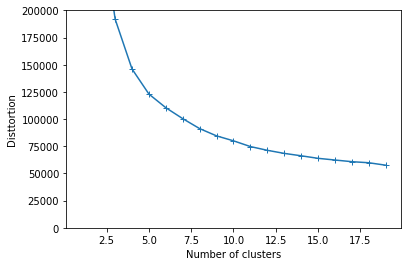

In [66]:
plt.plot(range(1,20),p_dist_list,marker='+');
plt.xlabel("Number of clusters");
plt.ylabel("Disttortion");
plt.ylim(0,200000);

- k=8

In [9]:
p_X = p_merged4_count_df_std
p_kmpp = KMeans(n_clusters=8,init="random",random_state=0)
p_kmpp.fit(p_X)
p_label_df = pd.DataFrame(p_kmpp.labels_, columns=["cluster"])

In [10]:
p_label_df.groupby("cluster").size()

cluster
0     230
1      24
2    2754
3     179
4     792
5      18
6      53
7    9816
dtype: int64

- 約8クラスターで分類（５つの大クラスタ、３つの小クラスタ）

In [38]:
p_target_df = p_merged4_count_df.reset_index().rename(columns={"index":"user_id"})
p_clustered_df = pd.concat([p_target_df, p_label_df], axis=1)
pd.concat([p_clustered_df.groupby('cluster').size(),p_clustered_df.groupby('cluster').mean()],axis=1).rename(columns={0:'商品数'})

,商品数,クリック,購入,閲覧,カート
cluster,,,,,
0,230,18.391304,49.352174,971.513043,772.834783
1,24,98.083333,41.250000,1901.750000,1023.291667
2,2754,2.979666,7.661583,206.278504,139.774510
3,179,25.871508,13.094972,494.279330,297.832402
4,792,5.563131,21.680556,484.564394,354.905303
5,18,150.000000,203.000000,4180.944444,3066.277778
6,53,45.849057,106.226415,1979.566038,1622.377358
7,9816,0.454055,1.255196,50.139976,22.810921


In [40]:
p_clustered_df = p_clustered_df[['product_id','cluster']]
p_clustered_df

,product_id,cluster
0,00000000_a,7
1,00000001_a,2
2,00000002_a,7
3,00000003_a,2
4,00000004_a,7
5,00000005_a,7
6,00000006_a,2
7,00000007_a,7
8,00000008_a,7
9,00000009_a,4


In [41]:
p_clustered_df.to_csv("product_cluster_A.csv", sep=",", index=False)

##### クリックと購入

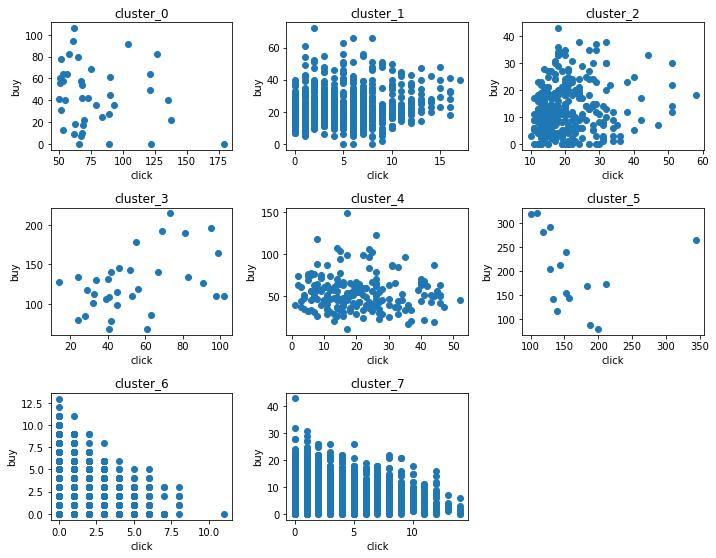

In [75]:
plt.figure(figsize=(10,10))
p_target_df = p_merged4_count_df.reset_index().rename(columns={"index":"user_id"})[['クリック', '購入','閲覧']]
p_clustered_df = pd.concat([p_target_df, p_label_df], axis=1)
for i in range(0,8):
    p_df_sampled = p_clustered_df[p_clustered_df["cluster"] == i]
    plt.subplot(4, 3, i+1)
    plt.scatter(p_df_sampled.as_matrix()[:,0],p_df_sampled.as_matrix()[:,1])
    #plt.xlim(0,500)
    #plt.ylim(0,16)
    plt.xlabel('click')
    plt.ylabel('buy')
    plt.title("cluster_" + str(i))
plt.tight_layout()

##### 閲覧数

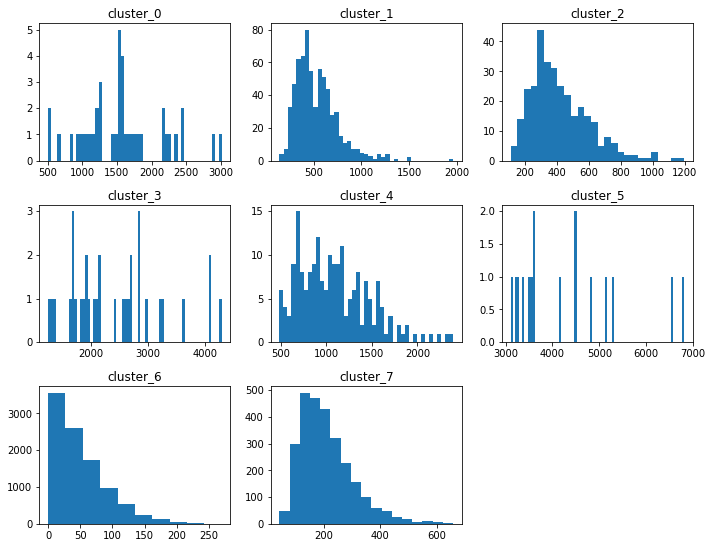

In [85]:
plt.figure(figsize=(10,10))
for i in range(0,8):
    p_df_sampled = p_clustered_df[p_clustered_df["cluster"] == i]
    plt.subplot(4, 3, i+1)
    p = p_df_sampled.as_matrix()[:,2]
    plt.hist(p,bins=int((p.max()-p.min())/50)+5)
    plt.title("cluster_" + str(i))
plt.tight_layout()

- 極端なもの以外だとクリック数が多いものや購入数が多いものが分かれそう

## 時間に関連した分析

In [87]:
train_A['day'] = train_A['time_stamp'].map(lambda x: pd.to_datetime(x).day)

In [88]:
usercount = train_A['user_id'].value_counts().count();

平均1.12050530192


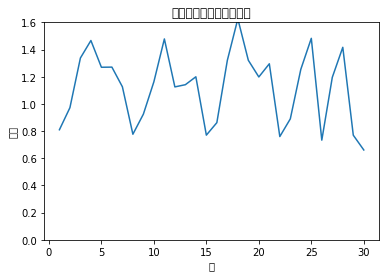

In [90]:
p = train_A.groupby('day')[['event_type_1']].sum() / usercount
plt.plot(p[0:30])
plt.ylim(0, 1.6)
plt.title('全体の平均閲覧数の推移');
plt.xlabel('日');
plt.ylabel('回数');
print('平均'+str(p[0:30].mean()[0]))

平均0.0188999511291


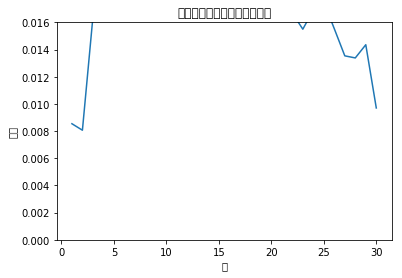

In [91]:
p = train_A.groupby('day')[['event_type_2']].sum() / usercount
plt.plot(p[0:30])
plt.ylim(0,0.016)
plt.title(u'全体の平均クリック数の推移');
plt.xlabel(u'日');
plt.ylabel(u'回数');
print('平均'+str(p[0:30].mean()[0]))

平均0.0421948696967


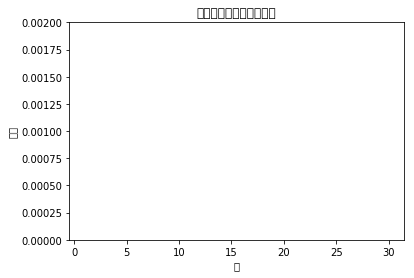

In [92]:
p = train_A.groupby('day')[['event_type_3']].sum() / usercount
plt.plot(p[0:30])
plt.ylim(0,0.002)
plt.title(u'全体の平均購入数の推移');
plt.xlabel(u'日');
plt.ylabel(u'回数');
print('平均'+str(p[0:30].mean()[0]))

- ばらつきはあるが誤差の内？
- 時期的に4月は減っていく時期?

In [36]:
print(len(train_C['user_id'].unique()))
print(len(train_C['product_id'].unique()))
print(len(train_C[train_C['event_type_3']]))

43271
313609
1358


##### 購入した人はその前の期間に何をしている傾向があるか？
- 16日以降に購入した人の前15日間のアクションの平均を調べる

In [46]:
count = 0
countad = 0
a = None
for e in train_C[train_C['event_type_3']][['day', 'user_id', 'product_id', 'ad']].as_matrix():
    if e[0] > 15 and e[0] < 31:
        add = train_C[np.logical_and(train_C['user_id'] == e[1], train_C['day'] <= e[0])][['day', 'event_type', 'product_id']]
        add['day'] = add['day'].map(lambda x: x - e[0]) #何日前か(マイナス)
        add['product_id'] = add['product_id'].map(lambda x: x==e[2]) #同じ商品かbool
        add['ad'] = e[3]
        if count != 0:
            a = pd.concat([a, add])
        else:
            a = add
        count = count + 1
        countad = countad + e[3]

In [47]:
aad = a[a['ad']==1]
print(len(a), len(aad))
print(count, countad)

(33386, 13125)
(569, 197)


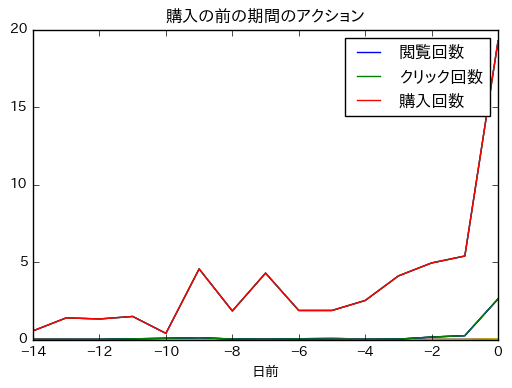

In [50]:
plt.plot(aad[aad['event_type'] == 1].groupby('day').count() / countad);
plt.plot(aad[aad['event_type'] == 2].groupby('day').count() / countad);
plt.plot(aad[aad['event_type'] == 3].groupby('day').count() / countad);
plt.legend([u'閲覧回数', u'クリック回数', u'購入回数']);
plt.xlim(-14,0);
plt.xlabel(u'日前');
plt.title(u'購入の前の期間のアクション');

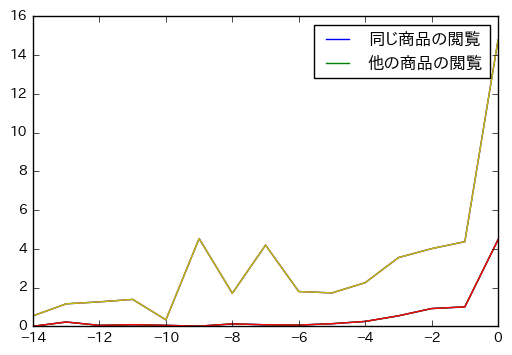

In [51]:
plt.plot(aad[np.logical_and(aad['event_type'] == 1, aad['product_id'])].groupby('day').count() / countad)
plt.plot(aad[np.logical_and(aad['event_type'] == 1, np.logical_not(aad['product_id']))].groupby('day').count() / countad)
plt.legend([u'同じ商品の閲覧',u'他の商品の閲覧']);
plt.xlim(-14,0);

- 購入する9日ほど前にはその商品を閲覧している割合が高い→閲覧から購入を予想できるのでは?

# 評価値の導出式

### 方針

- 似たユーザーがアドを見たときに買いそうなほど高い値になるようにする

### イメージ

- アド経由で買った→高ポイント
- アド経由無しで買った→そこそこ高ポイント
- 迷ったけどやめた→中ポイント
- 見てすぐやめた→低ポイント

In [ ]:
#関数
def score(eventlist):
    if np.logical_and(eventlist['event_type'] == 3, eventlist['ad'] == 1).sum() > 0:
        return 10.0
    if np.logical_and(eventlist['event_type'] == 3, eventlist['ad'] == 0).sum() > 0:
        return 8.0
    score = 0
    for event in events:
        if event['event_type'] == 1:
            score += 1.0
        else if event['event_type'] == 2:
            score += 2.0
    return score

(思ったこと)

閲覧だけしてる商品は評価値自体は高くなくても、その人が買う確率は高い？

- クラスターごとに点数のつけかた変える

#### 評価値つけかた

###### 時間について

- 最近見たほど高スコア…あまり他のユーザーは関係ない

(協調フィルタリング行列にユーザー×商品行列を足した方がいい？(+商品ごとの値))

###### クラスターと評価値

- ユーザー/商品ごとの各イベントの回数をつかう？

- パラメータの基準

In [ ]:
#関数
def score(eventlist, user_cluster):
    '''user_cluster分類
    0 : 閲覧が多いグループ。クリック/購入はほぼ0。同じものを後で見ることもある。
    1 : 購入が多いグループ。何度か閲覧してから購入する場合が多い。
    2 : どれも多くない。閲覧だけを100回未満など。同じものを後で見ることもある。割合は一番大きい。
    3 : クリックが多い。同じものを何度もクリックや閲覧している。
    '''
    scores = {
        0 : [5.0, 4.5, 3.0, 0.2, 0.2, 4.0]
        1 : [5.0, 4.5, 3.0, 0.4, 0.4, 5.0]
        2 : [5.0, 4.5, 3.0, 0.2, 0.2, 4.0]
        3 : [5.0, 4.5, 3.0, 0.3, 0.6, 5.0]
    }
    
    if np.logical_and(eventlist['event_type'] == 3, eventlist['ad'] == 1).sum() > 0:
        #アド経由でコンバージェンス
        return scores[user_cluster][0]
    if np.logical_and(eventlist['event_type'] == 3, eventlist['ad'] == 0).sum() > 0:
        #アドなしでコンバージェンス
        return scores[user_cluster][1]
    #それ以外の場合の基準点
    score = scores[user_cluster][2]
    for event in events:
        if event['event_type'] == 1:
            #クリックで加点
            score += scores[user_cluster][3]
        else if event['event_type'] == 2:
            #カートで加点
            score += scores[user_cluster][4]
    #上限より高くはしない
    return min(score,scores[user_cluster][5])

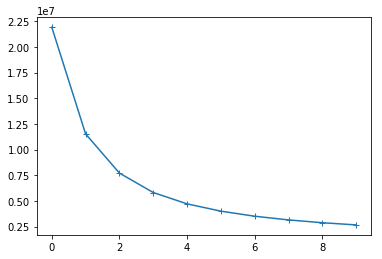

a = 388573.133938
b = -5098913.23064
c = 18660437.5206


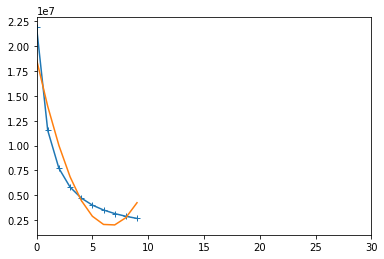

In [24]:
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import optimize as opt

Px = np.arange(10)
Py = [21920591,11523829,7713188,5819131,4715053,4002994,3510134,3150644,2877609,2663450]
plt.plot(Px, Py,marker='+')
plt.show()


def fit_func(x, a, b, c):
    return a * x**2 + b * x + c

res = opt.curve_fit(fit_func, Px, Py)

a = res[0][0]
b = res[0][1]
c = res[0][2]
print("a = %s" % (a))
print("b = %s" % (b))
print("c = %s" % (c))

Px2 = []
for x in Px:
    Px2.append(a * x**2 + b * x + c)

plt.xlim([0,30])
plt.plot(Px, Py,marker='+')
plt.plot(Px, np.array(Px2))
plt.show()